<a href="https://colab.research.google.com/github/ManavBansal/Vyntelligence/blob/master/src/testingHeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Step1**: Upload image on drive
#### **Step2**: Get ID from the sharable link of image
###### For example: In this link, https://drive.google.com/file/d/1wBDiN1fkvKdPIGDu7OU3Xan6ROnnsVCG/view?usp=sharing
Has ID = 1wBDiN1fkvKdPIGDu7OU3Xan6ROnnsVCG"

#### **Step3**:  Assign that ID to the below variable "id"

In [1]:
id = "1wBDiN1fkvKdPIGDu7OU3Xan6ROnnsVCG"

### Just run the below *blocks*

In [2]:
import requests

In [3]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [4]:
from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils

In [5]:
download_file_from_google_drive("1-OFT9AgNmYSU7QG_fgvnxXGDTjN4lwT_","\myModel.h5")
model=models.load_model("\myModel.h5")

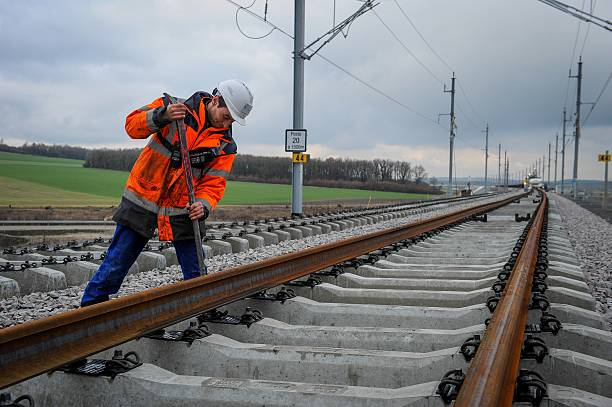

 Not height, Probability [0.0131456]


In [7]:
download_file_from_google_drive(id,"\imageTest.jpg")
img = cv2.imread("\imageTest.jpg",cv2.IMREAD_UNCHANGED)
# print(img.shape)
cv2_imshow(img)
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img = cv2.resize(img, (400, 400), interpolation=cv2.INTER_CUBIC)
image = img_to_array(img)
image = np.expand_dims(image, axis=0)
preds = model.predict(image)
# image.shape
if(preds[0]>0.5):
    label="Height"
    print(label + ", Probability " + str(preds[0]))
else:
    label=" Not height"
    print(label + ", Probability " + str(preds[0]))